In [125]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Flatten,Dropout,Dense,BatchNormalization,Activation
import tensorflow as tf
import numpy as np
from scipy.io import loadmat
import h5py
import matplotlib.pyplot as plt

In [126]:
# # Open the file as readonly
# h5f = h5py.File('./SVHN.hdf5', 'r')

# # Load the training, test and validation set
# x_train = h5f['x_train'][()]
# y_train = h5f['y_train'][()]
# x_test = h5f['x_test'][()]
# y_test = h5f['y_test'][()]

# # Close this file
# h5f.close()

In [127]:
Train = loadmat('./train_32x32.mat')
Test = loadmat('./test_32x32.mat') 

X_train = Train['X']
y_train = Train['y']
X_test = Test['X']
y_test = Test['y']

print('Training set', X_train.shape, y_train.shape)
print('Test set', X_test.shape, y_test.shape)

Training set (32, 32, 3, 73257) (73257, 1)
Test set (32, 32, 3, 26032) (26032, 1)


In [128]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

X_train = X_train[np.newaxis,...]
X_train = np.swapaxes(X_train,0,4).squeeze()

X_test = X_test[np.newaxis,...]
X_test = np.swapaxes(X_test,0,4).squeeze()

print('Training set', X_train.shape, y_train.shape)
print('Test set', X_test.shape, y_test.shape)

Training set (73257, 32, 32, 3) (73257, 1)
Test set (26032, 32, 32, 3) (26032, 1)


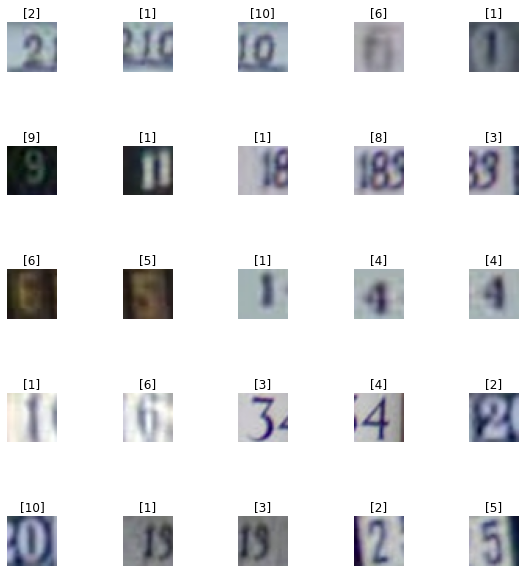

In [129]:
fig=plt.figure(figsize=(10, 10))
plt.subplots_adjust(hspace=1.5)

columns = 5
rows = 5
for i in range(1, columns*rows +1):
    img = x_test[i]
    fig.add_subplot(rows, columns, i)
    plt.axis('off')
    plt.title(f'{y_test[i]}')
    plt.imshow(img, cmap='gray')
plt.show()

In [130]:
np.place(y_train,y_train == 10,0)
np.place(y_test,y_test == 10,0)

y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)

In [131]:
model = Sequential()

#WITHOUT batch normalization
model.add(Conv2D(32, (3, 3), padding='same',input_shape=(32, 32, 3),activation='relu'))
model.add(Conv2D(32, (3, 3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(64, (3, 3), padding='same',activation='relu'))
model.add(Conv2D(64, (3, 3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(512,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10,activation='softmax'))

In [132]:
model.summary()

Model: "sequential_16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_60 (Conv2D)           (None, 32, 32, 32)        896       
_________________________________________________________________
conv2d_61 (Conv2D)           (None, 30, 30, 32)        9248      
_________________________________________________________________
max_pooling2d_29 (MaxPooling (None, 15, 15, 32)        0         
_________________________________________________________________
dropout_40 (Dropout)         (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_62 (Conv2D)           (None, 15, 15, 64)        18496     
_________________________________________________________________
conv2d_63 (Conv2D)           (None, 13, 13, 64)        36928     
_________________________________________________________________
max_pooling2d_30 (MaxPooling (None, 6, 6, 64)        

In [133]:
gd = tf.keras.optimizers.SGD(lr=0.01,
                             decay=1e-6,
                             momentum=0.9,
                             nesterov=True)

monitor = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                           min_delta=0.001,
                                           patience=5, verbose=1,
                                           mode='auto',restore_best_weights=True)

In [135]:
model.compile(loss='categorical_crossentropy', optimizer=sgd,metrics=['accuracy'])
model.fit(X_train, y_train, 
          batch_size=128, 
          epochs=30, verbose=1,
          validation_data=(X_test, y_test),
          callbacks=[monitor])

Train on 73257 samples, validate on 26032 samples
Epoch 1/30
73257/73257 [==============================] - 14s 194us/sample - loss: 2.0510 - accuracy: 0.2691 - val_loss: 1.1066 - val_accuracy: 0.6475
Epoch 2/30
73257/73257 [==============================] - 13s 184us/sample - loss: 0.7779 - accuracy: 0.7573 - val_loss: 0.5450 - val_accuracy: 0.8393
Epoch 3/30
73257/73257 [==============================] - 13s 183us/sample - loss: 0.5190 - accuracy: 0.8394 - val_loss: 0.4561 - val_accuracy: 0.8652
Epoch 4/30
73257/73257 [==============================] - 13s 183us/sample - loss: 0.4358 - accuracy: 0.8661 - val_loss: 0.3748 - val_accuracy: 0.8909
Epoch 5/30
73257/73257 [==============================] - 13s 184us/sample - loss: 0.3885 - accuracy: 0.8818 - val_loss: 0.3229 - val_accuracy: 0.9076
Epoch 6/30
73257/73257 [==============================] - 13s 184us/sample - loss: 0.3585 - accuracy: 0.8914 - val_loss: 0.3542 - val_accuracy: 0.9025
Epoch 7/30
73257/73257 [====================

In [137]:
score = model.evaluate(X_test, y_test, verbose=0)
print('loss:', score[0])
print('Test accuracy:', score[1])

loss: 0.21920155078291748
Test accuracy: 0.9431469


In [138]:
model.save('SVHN_model.h5')
model.save_weights('SVHN_weights.h5')